In [2]:
%matplotlib inline
from matplotlib import pyplot as plt
from pathlib import Path
import pandas as pd
import tarfile
import urllib.request
import numpy as np


def load_housing_data():
    tarball_path = Path("datasets/housing.tgz")
    if not tarball_path.is_file():
        Path("datasets").mkdir(parents=True, exist_ok=True)
        url = "https://github.com/ageron/data/raw/main/housing.tgz"
        urllib.request.urlretrieve(url, tarball_path)
        with tarfile.open(tarball_path) as housing_tarball:
            housing_tarball.extractall(path="datasets")
    return pd.read_csv(Path("datasets/housing/housing.csv"))



# extra code – code to save the figures as high-res PNGs for the book

IMAGES_PATH = Path() / "images" / "end_to_end_project"
IMAGES_PATH.mkdir(parents=True, exist_ok=True)

def save_fig(fig_id, tight_layout=True, fig_extension="png", resolution=300):
    path = IMAGES_PATH / f"{fig_id}.{fig_extension}"
    if tight_layout:
        plt.tight_layout()
    plt.savefig(path, format=fig_extension, dpi=resolution)



housing = load_housing_data()


import os
import plotly.io as pio

def save_plotly_figure(figure, file_name, directory_path):
    """
    Save a Plotly figure object as a PNG image.
    """
    # Create the directory if it doesn't exist
    if not os.path.exists(directory_path):
        os.makedirs(directory_path)
    
    # Save the figure as a PNG image
    file_path = os.path.join(directory_path, file_name)
    pio.write_image(figure, file_path, format="png")
    
    print(f"Figure saved as {file_path}")


In [50]:
housing.info()


<class 'pandas.core.frame.DataFrame'>
Index: 16512 entries, 13096 to 19888
Data columns (total 9 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           16512 non-null  float64
 1   latitude            16512 non-null  float64
 2   housing_median_age  16512 non-null  float64
 3   total_rooms         16512 non-null  float64
 4   total_bedrooms      16344 non-null  float64
 5   population          16512 non-null  float64
 6   households          16512 non-null  float64
 7   median_income       16512 non-null  float64
 8   median_house_value  16512 non-null  float64
dtypes: float64(9)
memory usage: 1.3 MB


In [4]:
housing.head()


longitude  latitude  housing_median_age  total_rooms  total_bedrooms   
0    -122.23     37.88                41.0        880.0           129.0  \
1    -122.22     37.86                21.0       7099.0          1106.0   
2    -122.24     37.85                52.0       1467.0           190.0   
3    -122.25     37.85                52.0       1274.0           235.0   
4    -122.25     37.85                52.0       1627.0           280.0   

   population  households  median_income  median_house_value ocean_proximity  
0       322.0       126.0         8.3252            452600.0        NEAR BAY  
1      2401.0      1138.0         8.3014            358500.0        NEAR BAY  
2       496.0       177.0         7.2574            352100.0        NEAR BAY  
3       558.0       219.0         5.6431            341300.0        NEAR BAY  
4       565.0       259.0         3.8462            342200.0        NEAR BAY

In [5]:
housing["ocean_proximity"].value_counts()


ocean_proximity
<1H OCEAN     9136
INLAND        6551
NEAR OCEAN    2658
NEAR BAY      2290
ISLAND           5
Name: count, dtype: int64

In [6]:
housing.describe()


longitude      latitude  housing_median_age   total_rooms   
count  20640.000000  20640.000000        20640.000000  20640.000000  \
mean    -119.569704     35.631861           28.639486   2635.763081   
std        2.003532      2.135952           12.585558   2181.615252   
min     -124.350000     32.540000            1.000000      2.000000   
25%     -121.800000     33.930000           18.000000   1447.750000   
50%     -118.490000     34.260000           29.000000   2127.000000   
75%     -118.010000     37.710000           37.000000   3148.000000   
max     -114.310000     41.950000           52.000000  39320.000000   

       total_bedrooms    population    households  median_income   
count    20433.000000  20640.000000  20640.000000   20640.000000  \
mean       537.870553   1425.476744    499.539680       3.870671   
std        421.385070   1132.462122    382.329753       1.899822   
min          1.000000      3.000000      1.000000       0.499900   
25%        296.000000    787.000000    280.000000       2.563400   
50%        435.000000   1166.000000    409.000000       3.534800   
75%        647.000000   1725.000000    605.000000       4.743250   
max       6445.000000  35682.000000   6082.000000      15.000100   

       median_house_value  
count        20640.000000  
mean        206855.816909  
std         115395.615874  
min          14999.000000  
25%         119600.000000  
50%         179700.000000  
75%         264725.000000  
max         500001.000000

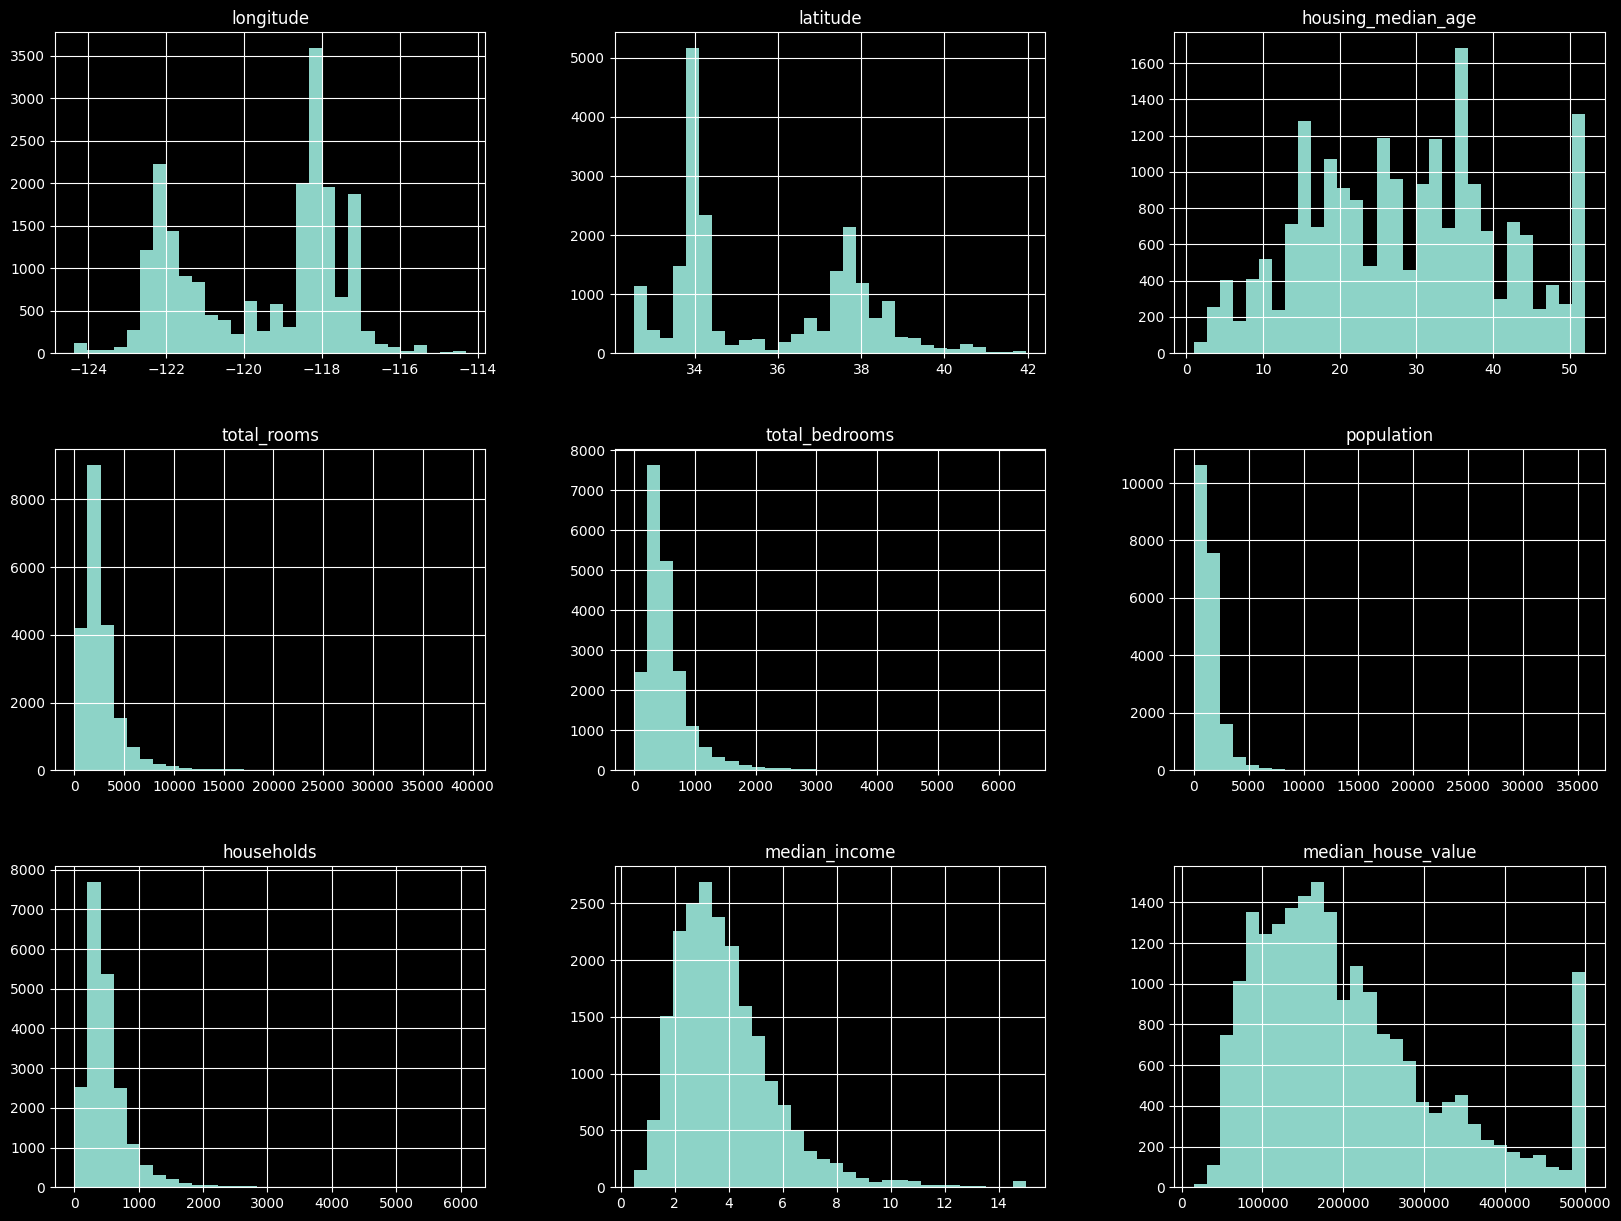

In [7]:
housing.hist(bins=30, figsize=(20, 15))
plt.show()


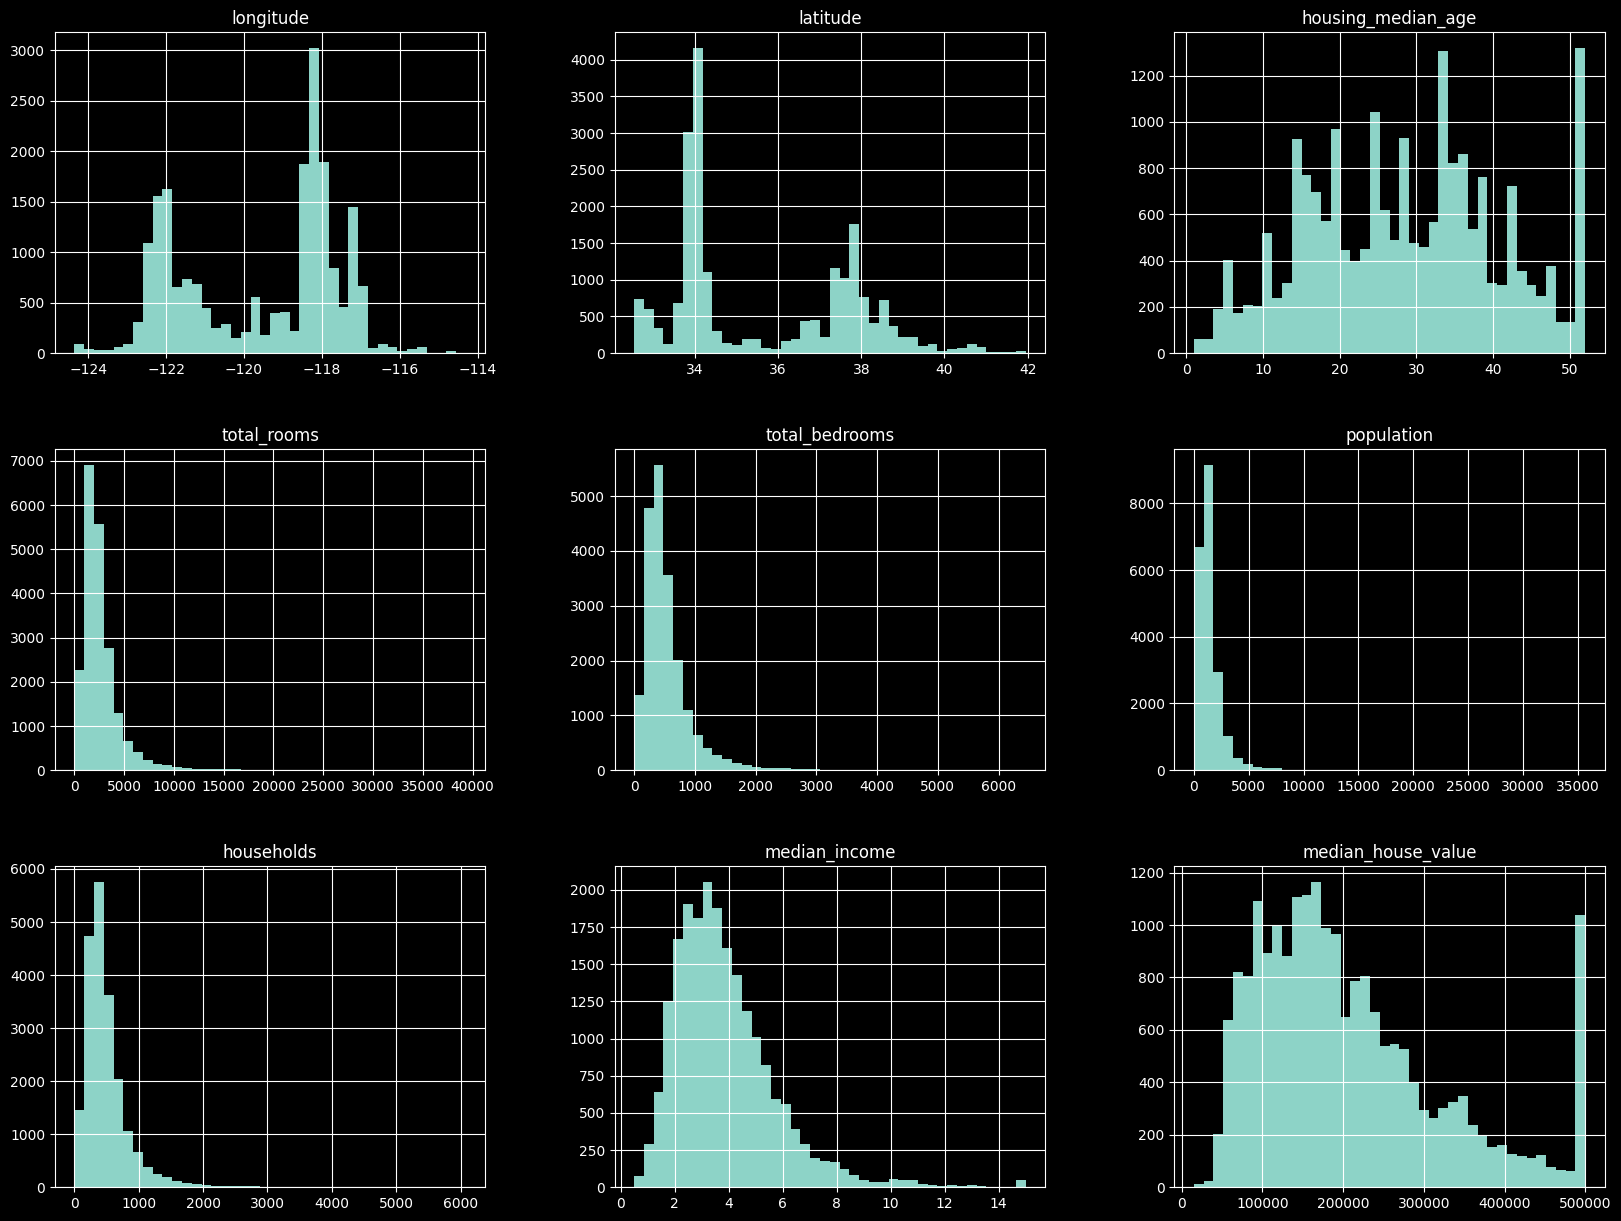

In [8]:
housing.hist(bins=40, figsize=(20, 15))
plt.show()


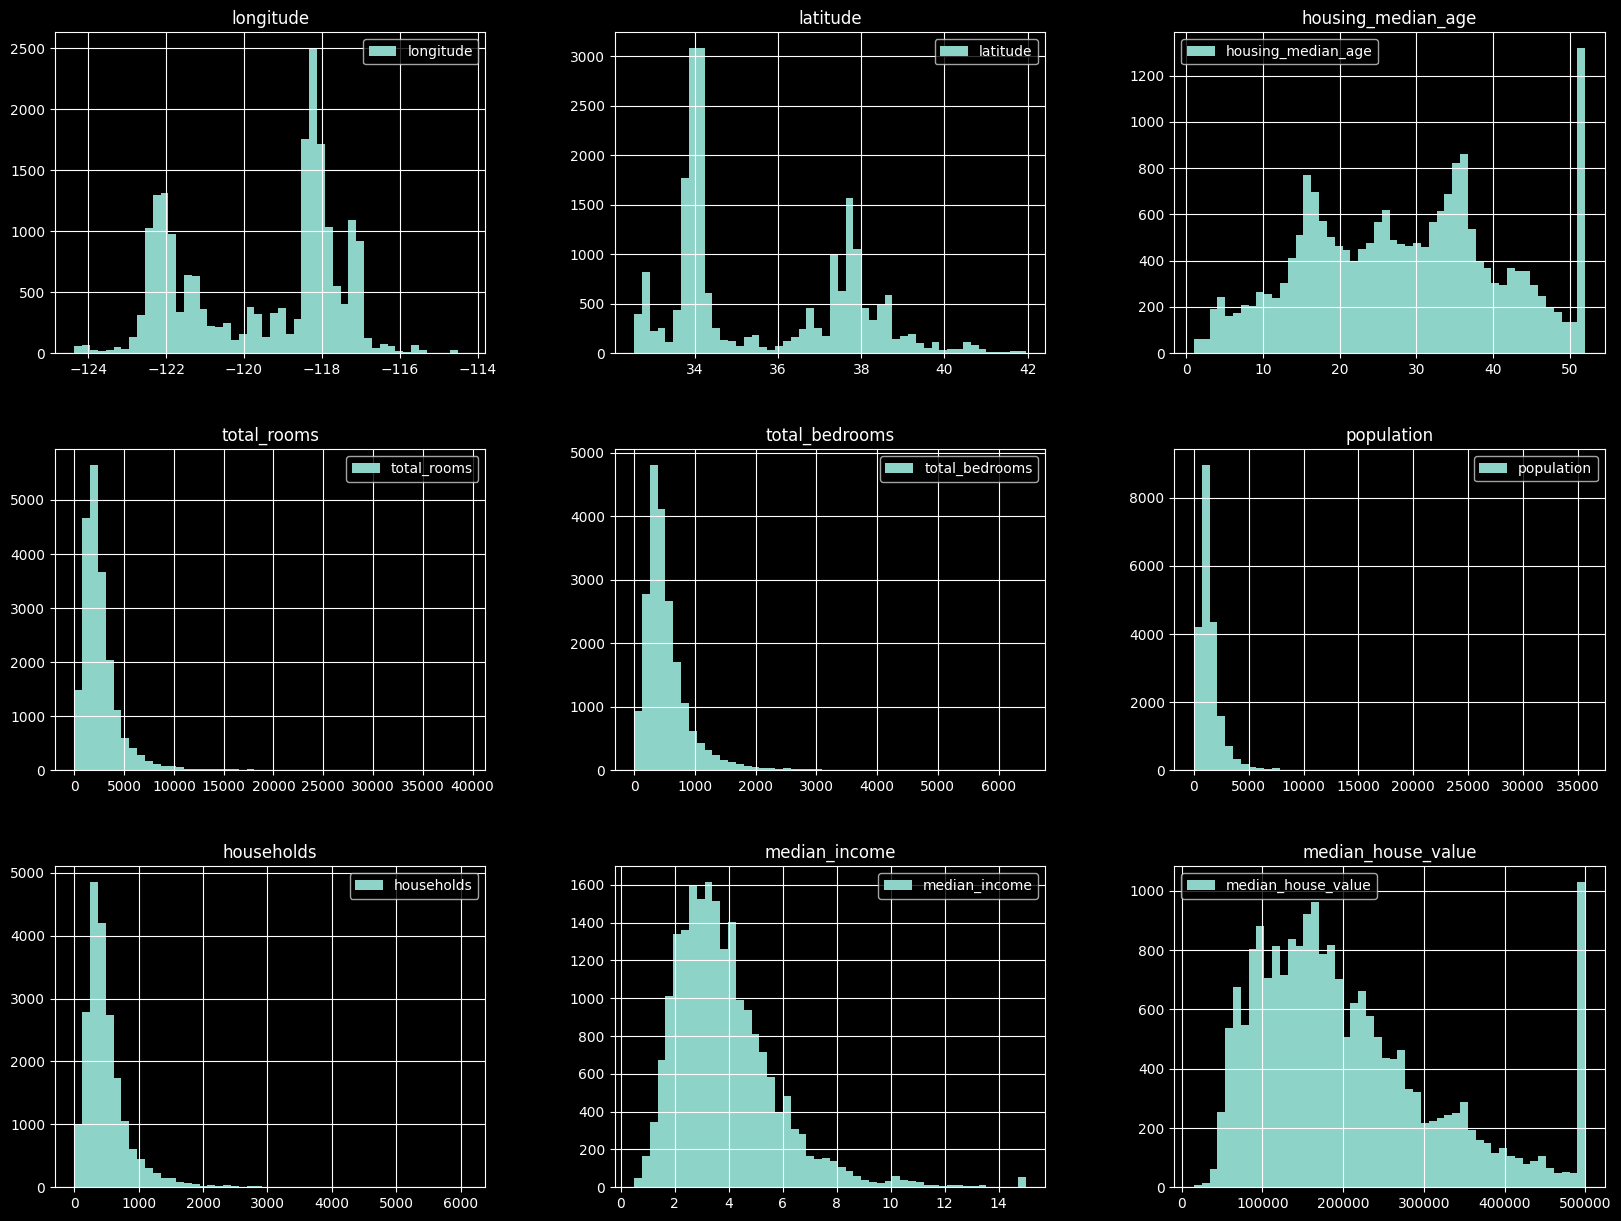

In [9]:
housing.hist(figsize=(20, 15), bins=50, legend=True)
plt.show()


##### First, the median income attribute does not look like it is expressed in US dollars
##### (USD). After checking with the team that collected the data, you are told that the
##### data has been scaled and capped at 15 (actually 15.0001) for higher median
##### incomes, and at 0.5 (actually 0.4999) for lower median incomes. Working with
##### preprocessed attributes is common in Machine Learning, and it is not necessarily


In [10]:
# housing.head()

import plotly.express as px

fig = px.histogram(housing["population"], nbins=160, opacity=0.8)
fig.show()


### Create A Test Set

In [11]:
np.random.permutation(len(housing))


array([10770, 12386, 14110, ..., 20519,  8722, 14587])

In [12]:
def shuffle_and_split_data(data, test_ratio):
    shuffled_indices = np.random.permutation(len(data))
    test_set_size = int(len(data) * test_ratio)
    test_indices = shuffled_indices[:test_set_size]
    train_indices = shuffled_indices[test_set_size:]
    return data.iloc[train_indices], data.iloc[test_indices]


In [13]:
from sklearn.model_selection import train_test_split


train_set, test_set = train_test_split(housing, test_size=0.2, random_state=42)


In [14]:
train_set


longitude  latitude  housing_median_age  total_rooms  total_bedrooms   
14196    -117.22     32.75                34.0       6001.0          1111.0  \
8267     -117.03     32.69                10.0        901.0           163.0   
17445    -122.27     37.74                28.0       6909.0          1554.0   
14265    -121.82     37.25                25.0       4021.0           634.0   
2271     -115.98     33.32                 8.0        240.0            46.0   
...          ...       ...                 ...          ...             ...   
11284    -122.37     37.94                49.0        969.0           229.0   
11964    -118.38     33.89                35.0       1778.0           330.0   
5390     -119.33     36.28                16.0       2624.0           527.0   
860      -117.19     34.08                22.0       2467.0           555.0   
15795    -118.86     34.22                22.0       1230.0           200.0   

       population  households  median_income  median_house_value   
14196      2654.0      1072.0         4.5878            291000.0  \
8267        698.0       167.0         4.6648            156100.0   
17445      2974.0      1484.0         3.6875            353900.0   
14265      2178.0       650.0         5.1663            241200.0   
2271         63.0        24.0         1.4688             53800.0   
...           ...         ...            ...                 ...   
11284       599.0       195.0         1.3167             71600.0   
11964       732.0       312.0         6.5745            379300.0   
5390       1077.0       520.0         2.1250            104200.0   
860        1567.0       494.0         2.6536             84700.0   
15795       673.0       195.0         6.2708            251400.0   

      ocean_proximity  
14196      NEAR OCEAN  
8267       NEAR OCEAN  
17445        NEAR BAY  
14265       <1H OCEAN  
2271           INLAND  
...               ...  
11284        NEAR BAY  
11964       <1H OCEAN  
5390           INLAND  
860            INLAND  
15795       <1H OCEAN  

[16512 rows x 10 columns]

In [15]:
test_set


longitude  latitude  housing_median_age  total_rooms  total_bedrooms   
20046    -122.38     40.67                10.0       2281.0           444.0  \
3024     -118.37     33.83                35.0       1207.0           207.0   
15663    -117.24     32.72                39.0       3089.0           431.0   
20484    -118.44     34.05                18.0       4780.0          1192.0   
9814     -118.44     34.18                33.0       2127.0           414.0   
...          ...       ...                 ...          ...             ...   
15362    -121.92     40.52                13.0       4581.0           881.0   
16623    -122.08     37.68                26.0       2607.0           682.0   
18086    -119.00     35.39                42.0       2839.0           516.0   
2144     -117.92     33.63                39.0       1469.0           226.0   
3665     -118.39     34.02                38.0       2447.0           636.0   

       population  households  median_income  median_house_value   
20046      1274.0       438.0         2.2120             65600.0  \
3024        601.0       213.0         4.7308            353400.0   
15663      1175.0       432.0         7.5925            466700.0   
20484      1886.0      1036.0         4.4674            500001.0   
9814       1056.0       391.0         4.3750            286100.0   
...           ...         ...            ...                 ...   
15362      1799.0       734.0         2.2993             99500.0   
16623      1401.0       607.0         2.6563            184100.0   
18086      1203.0       487.0         3.7708             79400.0   
2144        553.0       225.0         7.8496            490800.0   
3665       1312.0       574.0         3.5909            279400.0   

      ocean_proximity  
20046          INLAND  
3024        <1H OCEAN  
15663      NEAR OCEAN  
20484       <1H OCEAN  
9814        <1H OCEAN  
...               ...  
15362          INLAND  
16623        NEAR BAY  
18086          INLAND  
2144        <1H OCEAN  
3665        <1H OCEAN  

[4128 rows x 10 columns]

##### This code is used to create a new column in a dataset of housing information. The new column is called "income_cat" and it will categorize the values in the existing "median_income" column into 5 different groups, or "bins".

##### The pd.cut() function is used to create these bins by specifying the range of values for each bin. For example, values in the "median_income" column that fall between 0 and 1.5 will be grouped into one bin, while values between 1.5 and 3.0 will be grouped into another bin, and so on.

##### The purpose of creating these income categories is to make it easier to analyze the data and identify any patterns or trends based on income level. This can be useful, for example, in identifying which neighborhoods have higher or lower incomes and how this might affect housing prices.

In [16]:
housing.head()


longitude  latitude  housing_median_age  total_rooms  total_bedrooms   
0    -122.23     37.88                41.0        880.0           129.0  \
1    -122.22     37.86                21.0       7099.0          1106.0   
2    -122.24     37.85                52.0       1467.0           190.0   
3    -122.25     37.85                52.0       1274.0           235.0   
4    -122.25     37.85                52.0       1627.0           280.0   

   population  households  median_income  median_house_value ocean_proximity  
0       322.0       126.0         8.3252            452600.0        NEAR BAY  
1      2401.0      1138.0         8.3014            358500.0        NEAR BAY  
2       496.0       177.0         7.2574            352100.0        NEAR BAY  
3       558.0       219.0         5.6431            341300.0        NEAR BAY  
4       565.0       259.0         3.8462            342200.0        NEAR BAY

In [17]:
# pd.DataFrame(housing.median_income.values)


In [18]:
housing["income_cat"] = pd.cut(
    housing["median_income"],
    bins=[0.0, 1.5, 3.0, 4.5, 6.0, np.inf],
    labels=[1, 2, 3, 4, 5],
)


<Axes: >

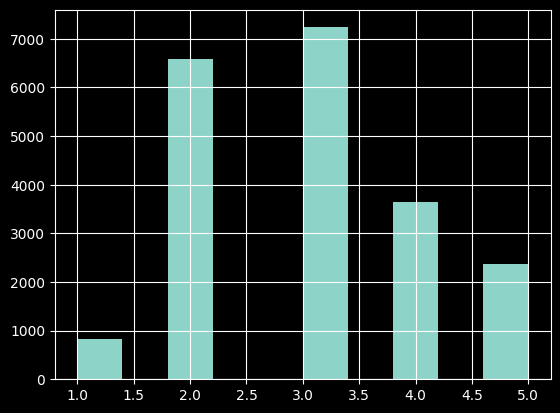

In [19]:
housing.income_cat.hist()


<Axes: ylabel='count'>

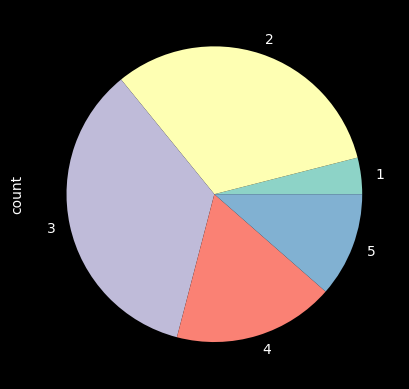

In [20]:
housing["income_cat"].value_counts().sort_index().plot.pie()


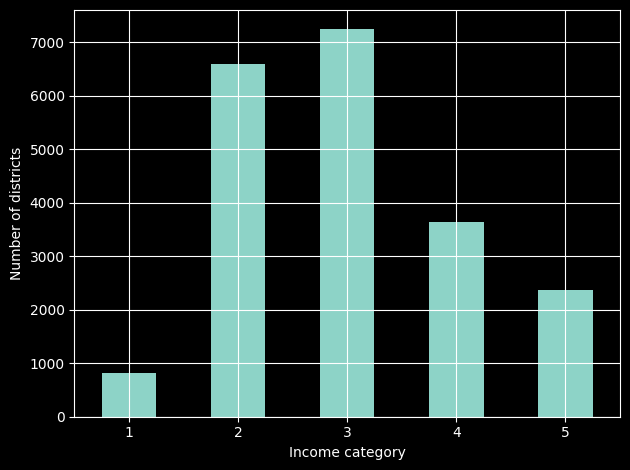

In [21]:
housing["income_cat"].value_counts().sort_index().plot.bar(grid=True, rot=0)

plt.xlabel("Income category")
plt.ylabel("Number of districts")
save_fig("housing_income_cat_bar_plot")  # extra code
plt.show()


In [22]:
housing.head()


longitude  latitude  housing_median_age  total_rooms  total_bedrooms   
0    -122.23     37.88                41.0        880.0           129.0  \
1    -122.22     37.86                21.0       7099.0          1106.0   
2    -122.24     37.85                52.0       1467.0           190.0   
3    -122.25     37.85                52.0       1274.0           235.0   
4    -122.25     37.85                52.0       1627.0           280.0   

   population  households  median_income  median_house_value ocean_proximity   
0       322.0       126.0         8.3252            452600.0        NEAR BAY  \
1      2401.0      1138.0         8.3014            358500.0        NEAR BAY   
2       496.0       177.0         7.2574            352100.0        NEAR BAY   
3       558.0       219.0         5.6431            341300.0        NEAR BAY   
4       565.0       259.0         3.8462            342200.0        NEAR BAY   

  income_cat  
0          5  
1          5  
2          5  
3          4  
4          3

###   Stratified sampling based on the income category

#####  This code snippet uses the StratifiedShuffleSplit class from the sklearn.model_selection module to split the housing 
#####  DataFrame into training and test sets, 
#####  while ensuring that the income category proportions are preserved in both sets

In [23]:
from sklearn.model_selection import StratifiedShuffleSplit

splitter = StratifiedShuffleSplit(n_splits=1, test_size=0.2, random_state=42)

for train_index, test_index in splitter.split(housing, housing["income_cat"]):
    print(train_index)
    strata_train_set = housing.loc[train_index]
    strata_test_set = housing.loc[test_index]


# for train_index, test_index in splitter.split(housing, housing["income_cat"]):
#     strat_train_set = housing.loc[train_index]
#     strat_test_set = housing.loc[test_index]


[13096 14973  3785 ... 19301 19121 19888]


####  Now We See Equal Percentage of the Median income distributed between the test_set and train_test

In [24]:
strata_test_set["income_cat"].value_counts() / len(strata_test_set)


income_cat
3    0.350533
2    0.318798
4    0.176357
5    0.114341
1    0.039971
Name: count, dtype: float64

In [25]:
strata_train_set["income_cat"].value_counts() / len(strata_train_set)


income_cat
3    0.350594
2    0.318859
4    0.176296
5    0.114462
1    0.039789
Name: count, dtype: float64

In [26]:
housing


longitude  latitude  housing_median_age  total_rooms  total_bedrooms   
0        -122.23     37.88                41.0        880.0           129.0  \
1        -122.22     37.86                21.0       7099.0          1106.0   
2        -122.24     37.85                52.0       1467.0           190.0   
3        -122.25     37.85                52.0       1274.0           235.0   
4        -122.25     37.85                52.0       1627.0           280.0   
...          ...       ...                 ...          ...             ...   
20635    -121.09     39.48                25.0       1665.0           374.0   
20636    -121.21     39.49                18.0        697.0           150.0   
20637    -121.22     39.43                17.0       2254.0           485.0   
20638    -121.32     39.43                18.0       1860.0           409.0   
20639    -121.24     39.37                16.0       2785.0           616.0   

       population  households  median_income  median_house_value   
0           322.0       126.0         8.3252            452600.0  \
1          2401.0      1138.0         8.3014            358500.0   
2           496.0       177.0         7.2574            352100.0   
3           558.0       219.0         5.6431            341300.0   
4           565.0       259.0         3.8462            342200.0   
...           ...         ...            ...                 ...   
20635       845.0       330.0         1.5603             78100.0   
20636       356.0       114.0         2.5568             77100.0   
20637      1007.0       433.0         1.7000             92300.0   
20638       741.0       349.0         1.8672             84700.0   
20639      1387.0       530.0         2.3886             89400.0   

      ocean_proximity income_cat  
0            NEAR BAY          5  
1            NEAR BAY          5  
2            NEAR BAY          5  
3            NEAR BAY          4  
4            NEAR BAY          3  
...               ...        ...  
20635          INLAND          2  
20636          INLAND          2  
20637          INLAND          2  
20638          INLAND          2  
20639          INLAND          2  

[20640 rows x 11 columns]

In [27]:
def income_cat_proportions(data):
    # Compare Stratified, Random
    return data["income_cat"].value_counts() / len(data)


train_set, test_set = train_test_split(housing, test_size=0.2, random_state=42)

compare_props = pd.DataFrame(
    {
        "Overall %": income_cat_proportions(housing),
        "Stratified %": income_cat_proportions(strata_test_set),
        "Random %": income_cat_proportions(test_set),
    }
).sort_index()
compare_props.index.name = "Income Category"
compare_props["Strat. Error %"] = (
    compare_props["Stratified %"] / compare_props["Overall %"] - 1
)
compare_props["Rand. Error %"] = (
    compare_props["Random %"] / compare_props["Overall %"] - 1
)
(compare_props * 100).round(2)


Overall %  Stratified %  Random %  Strat. Error %   
Income Category                                                      
1                     3.98          4.00      4.24            0.36  \
2                    31.88         31.88     30.74           -0.02   
3                    35.06         35.05     34.52           -0.01   
4                    17.63         17.64     18.41            0.03   
5                    11.44         11.43     12.09           -0.08   

                 Rand. Error %  
Income Category                 
1                         6.45  
2                        -3.59  
3                        -1.53  
4                         4.42  
5                         5.63

In [28]:
housing


longitude  latitude  housing_median_age  total_rooms  total_bedrooms   
0        -122.23     37.88                41.0        880.0           129.0  \
1        -122.22     37.86                21.0       7099.0          1106.0   
2        -122.24     37.85                52.0       1467.0           190.0   
3        -122.25     37.85                52.0       1274.0           235.0   
4        -122.25     37.85                52.0       1627.0           280.0   
...          ...       ...                 ...          ...             ...   
20635    -121.09     39.48                25.0       1665.0           374.0   
20636    -121.21     39.49                18.0        697.0           150.0   
20637    -121.22     39.43                17.0       2254.0           485.0   
20638    -121.32     39.43                18.0       1860.0           409.0   
20639    -121.24     39.37                16.0       2785.0           616.0   

       population  households  median_income  median_house_value   
0           322.0       126.0         8.3252            452600.0  \
1          2401.0      1138.0         8.3014            358500.0   
2           496.0       177.0         7.2574            352100.0   
3           558.0       219.0         5.6431            341300.0   
4           565.0       259.0         3.8462            342200.0   
...           ...         ...            ...                 ...   
20635       845.0       330.0         1.5603             78100.0   
20636       356.0       114.0         2.5568             77100.0   
20637      1007.0       433.0         1.7000             92300.0   
20638       741.0       349.0         1.8672             84700.0   
20639      1387.0       530.0         2.3886             89400.0   

      ocean_proximity income_cat  
0            NEAR BAY          5  
1            NEAR BAY          5  
2            NEAR BAY          5  
3            NEAR BAY          4  
4            NEAR BAY          3  
...               ...        ...  
20635          INLAND          2  
20636          INLAND          2  
20637          INLAND          2  
20638          INLAND          2  
20639          INLAND          2  

[20640 rows x 11 columns]

In [29]:
strata_test_set


longitude  latitude  housing_median_age  total_rooms  total_bedrooms   
3905     -121.95     37.11                21.0       2387.0           357.0  \
16821    -118.01     33.89                36.0       1589.0           265.0   
2900     -118.18     33.74                30.0       5915.0          1750.0   
7193     -122.48     37.74                52.0       2166.0           423.0   
13928    -122.39     37.78                 5.0       1405.0           515.0   
...          ...       ...                 ...          ...             ...   
12369    -124.16     40.79                46.0       3042.0           597.0   
8707     -119.01     35.39                29.0       1820.0           459.0   
16634    -123.01     38.67                33.0        914.0           147.0   
9779     -122.03     37.60                24.0       2077.0           383.0   
3455     -117.12     32.74                52.0       1969.0           389.0   

       population  households  median_income  median_house_value   
3905        913.0       341.0         7.7360            397700.0  \
16821       804.0       272.0         4.6354            202900.0   
2900       2136.0      1503.0         4.0968            310000.0   
7193       1072.0       370.0         4.1310            314300.0   
13928       725.0       392.0         3.6037            187500.0   
...           ...         ...            ...                 ...   
12369      1206.0       541.0         2.1135             90600.0   
8707       1134.0       419.0         1.8289             59400.0   
16634       394.0       132.0         4.6875            246200.0   
9779       1488.0       389.0         4.5721            214700.0   
3455        877.0       424.0         3.7900            163400.0   

      ocean_proximity income_cat  
3905        <1H OCEAN          5  
16821       <1H OCEAN          4  
2900       NEAR OCEAN          3  
7193       NEAR OCEAN          3  
13928        NEAR BAY          3  
...               ...        ...  
12369      NEAR OCEAN          2  
8707           INLAND          2  
16634       <1H OCEAN          4  
9779         NEAR BAY          4  
3455       NEAR OCEAN          3  

[4128 rows x 11 columns]

In [30]:
strata_train_set


longitude  latitude  housing_median_age  total_rooms  total_bedrooms   
13096    -122.42     37.80                52.0       3321.0          1115.0  \
14973    -118.38     34.14                40.0       1965.0           354.0   
3785     -121.98     38.36                33.0       1083.0           217.0   
14689    -117.11     33.75                17.0       4174.0           851.0   
20507    -118.15     33.77                36.0       4366.0          1211.0   
...          ...       ...                 ...          ...             ...   
14207    -118.40     33.86                41.0       2237.0           597.0   
13105    -119.31     36.32                23.0       2945.0           592.0   
19301    -117.06     32.59                13.0       3920.0           775.0   
19121    -118.40     34.06                37.0       3781.0           873.0   
19888    -122.41     37.66                44.0        431.0           195.0   

       population  households  median_income  median_house_value   
13096      1576.0      1034.0         2.0987            458300.0  \
14973       666.0       357.0         6.0876            483800.0   
3785        562.0       203.0         2.4330            101700.0   
14689      1845.0       780.0         2.2618             96100.0   
20507      1912.0      1172.0         3.5292            361800.0   
...           ...         ...            ...                 ...   
14207       938.0       523.0         4.7105            500001.0   
13105      1419.0       532.0         2.5733             88800.0   
19301      2814.0       760.0         4.0616            148800.0   
19121      1725.0       838.0         4.1455            500001.0   
19888       682.0       212.0         3.2833            233300.0   

      ocean_proximity income_cat  
13096        NEAR BAY          2  
14973       <1H OCEAN          5  
3785           INLAND          2  
14689          INLAND          2  
20507      NEAR OCEAN          3  
...               ...        ...  
14207       <1H OCEAN          4  
13105          INLAND          2  
19301      NEAR OCEAN          3  
19121       <1H OCEAN          3  
19888      NEAR OCEAN          3  

[16512 rows x 11 columns]

In [31]:
for set_ in (strata_train_set, strata_test_set):
    set_.drop("income_cat", axis=1, inplace=True)


In [32]:
housing


longitude  latitude  housing_median_age  total_rooms  total_bedrooms   
0        -122.23     37.88                41.0        880.0           129.0  \
1        -122.22     37.86                21.0       7099.0          1106.0   
2        -122.24     37.85                52.0       1467.0           190.0   
3        -122.25     37.85                52.0       1274.0           235.0   
4        -122.25     37.85                52.0       1627.0           280.0   
...          ...       ...                 ...          ...             ...   
20635    -121.09     39.48                25.0       1665.0           374.0   
20636    -121.21     39.49                18.0        697.0           150.0   
20637    -121.22     39.43                17.0       2254.0           485.0   
20638    -121.32     39.43                18.0       1860.0           409.0   
20639    -121.24     39.37                16.0       2785.0           616.0   

       population  households  median_income  median_house_value   
0           322.0       126.0         8.3252            452600.0  \
1          2401.0      1138.0         8.3014            358500.0   
2           496.0       177.0         7.2574            352100.0   
3           558.0       219.0         5.6431            341300.0   
4           565.0       259.0         3.8462            342200.0   
...           ...         ...            ...                 ...   
20635       845.0       330.0         1.5603             78100.0   
20636       356.0       114.0         2.5568             77100.0   
20637      1007.0       433.0         1.7000             92300.0   
20638       741.0       349.0         1.8672             84700.0   
20639      1387.0       530.0         2.3886             89400.0   

      ocean_proximity income_cat  
0            NEAR BAY          5  
1            NEAR BAY          5  
2            NEAR BAY          5  
3            NEAR BAY          4  
4            NEAR BAY          3  
...               ...        ...  
20635          INLAND          2  
20636          INLAND          2  
20637          INLAND          2  
20638          INLAND          2  
20639          INLAND          2  

[20640 rows x 11 columns]

##  Discover and Visualize the Data to Gain Insights

#####   create a copy so you can play with it without harming the training set:

In [33]:
housing = strata_train_set.copy()


### Visualizing Geographical Data

#### Since there is geographical information (latitude and longitude), it is a good idea to create a scatterplot of all districts to visualize the data 

In [34]:
housing


longitude  latitude  housing_median_age  total_rooms  total_bedrooms   
13096    -122.42     37.80                52.0       3321.0          1115.0  \
14973    -118.38     34.14                40.0       1965.0           354.0   
3785     -121.98     38.36                33.0       1083.0           217.0   
14689    -117.11     33.75                17.0       4174.0           851.0   
20507    -118.15     33.77                36.0       4366.0          1211.0   
...          ...       ...                 ...          ...             ...   
14207    -118.40     33.86                41.0       2237.0           597.0   
13105    -119.31     36.32                23.0       2945.0           592.0   
19301    -117.06     32.59                13.0       3920.0           775.0   
19121    -118.40     34.06                37.0       3781.0           873.0   
19888    -122.41     37.66                44.0        431.0           195.0   

       population  households  median_income  median_house_value   
13096      1576.0      1034.0         2.0987            458300.0  \
14973       666.0       357.0         6.0876            483800.0   
3785        562.0       203.0         2.4330            101700.0   
14689      1845.0       780.0         2.2618             96100.0   
20507      1912.0      1172.0         3.5292            361800.0   
...           ...         ...            ...                 ...   
14207       938.0       523.0         4.7105            500001.0   
13105      1419.0       532.0         2.5733             88800.0   
19301      2814.0       760.0         4.0616            148800.0   
19121      1725.0       838.0         4.1455            500001.0   
19888       682.0       212.0         3.2833            233300.0   

      ocean_proximity  
13096        NEAR BAY  
14973       <1H OCEAN  
3785           INLAND  
14689          INLAND  
20507      NEAR OCEAN  
...               ...  
14207       <1H OCEAN  
13105          INLAND  
19301      NEAR OCEAN  
19121       <1H OCEAN  
19888      NEAR OCEAN  

[16512 rows x 10 columns]

<Axes: xlabel='longitude', ylabel='latitude'>

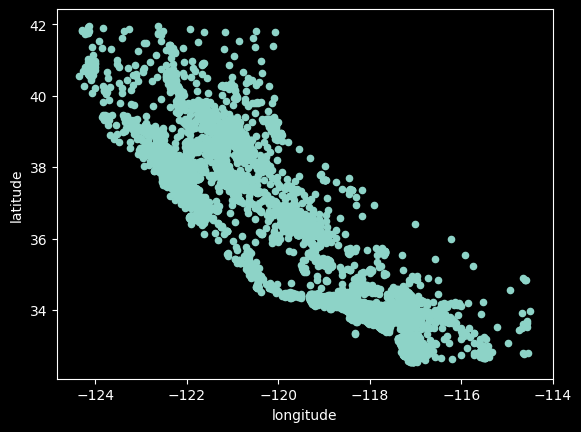

In [35]:
housing.plot(kind="scatter", x="longitude", y="latitude")


<Axes: xlabel='longitude', ylabel='latitude'>

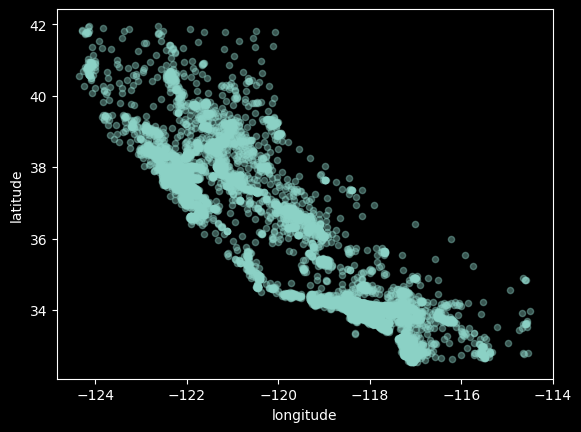

In [36]:
housing.plot(kind="scatter", x="longitude", y="latitude", alpha=0.4)


In [37]:
housing.info()


<class 'pandas.core.frame.DataFrame'>
Index: 16512 entries, 13096 to 19888
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           16512 non-null  float64
 1   latitude            16512 non-null  float64
 2   housing_median_age  16512 non-null  float64
 3   total_rooms         16512 non-null  float64
 4   total_bedrooms      16344 non-null  float64
 5   population          16512 non-null  float64
 6   households          16512 non-null  float64
 7   median_income       16512 non-null  float64
 8   median_house_value  16512 non-null  float64
 9   ocean_proximity     16512 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.4+ MB


#####  This code creates a scatter plot of the `housing` DataFrame, with the `longitude` column on the `x`-axis and the `latitude` column on the ##### `y`-axis. The `kind` parameter is set to "scatter" to create a scatter plot.

##### The `grid` parameter is set to `True`, which adds gridlines to the plot.

##### The `s` parameter sets the size of each point in the scatter plot. In this case, the size of each point is proportional to the `population` column, ##### divided by 100.

##### The `label` parameter sets the label for the `s` parameter in the plot legend.

##### The `c` parameter sets the color of each point in the scatter plot. In this case, the color is set to the `median_house_value` column of the ##### `housing` DataFrame.

##### The `cmap` parameter sets the color map for the scatter plot. In this case, the color map is set to "jet".

##### The `colorbar` parameter adds a color bar to the plot, which shows the mapping between colors and `median_house_value` values.

##### The `legend` parameter is set to `True`, which adds a legend to the plot.

##### The `sharex` parameter is set to `False`, which means that the `x`-axis will not be shared between subplots.

##### The `figsize` parameter sets the size of the plot. In this case, the plot size is set to 10 inches wide by 7 inches tall.

##### The `save_fig()` function saves the plot to a file called "housing_prices_scatterplot.png" in the current working directory.

##### Finally, the `plt.show()` function displays the plot.

<Axes: xlabel='longitude', ylabel='latitude'>

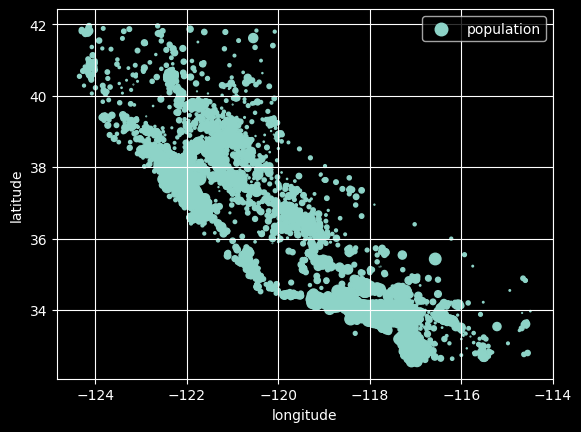

In [38]:
housing.plot(
    kind="scatter",
    x="longitude",
    y="latitude",
    grid=True,
    s=housing["population"] / 100,
    label="population",
    # c="median_house_value",
)


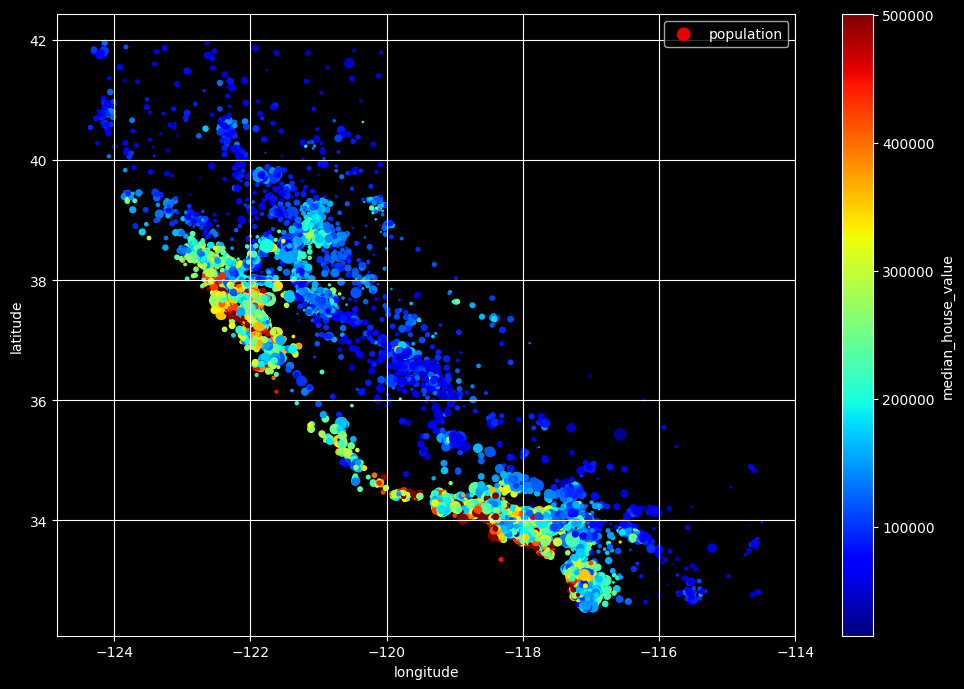

In [39]:
housing.plot(
    kind="scatter",
    x="longitude",
    y="latitude",
    grid=True,
    s=housing["population"] / 100,
    label="population",
    c="median_house_value",
    cmap="jet",
    colorbar=True,
    legend=True,
    # sharex=False,
    figsize=(10, 7),
)
save_fig("housing_prices_scatterplot")  # extra code
plt.show()


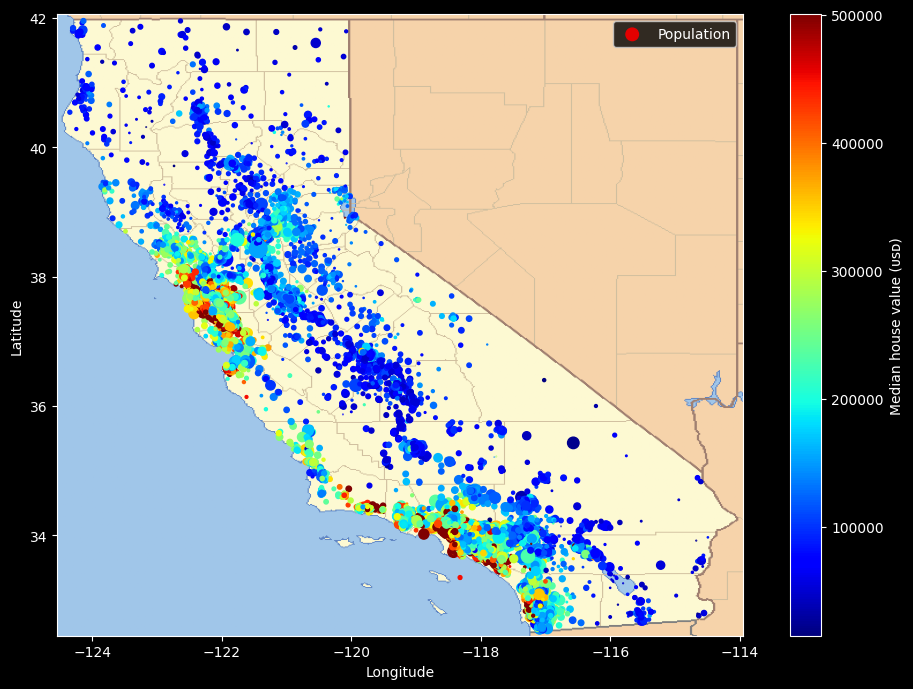

In [40]:
# extra code – this cell generates the first figure in the chapter

# Download the California image
filename = "california.png"
if not (IMAGES_PATH / filename).is_file():
    homl3_root = "https://github.com/ageron/handson-ml3/raw/main/"
    url = homl3_root + "images/end_to_end_project/" + filename
    print("Downloading", filename)
    urllib.request.urlretrieve(url, IMAGES_PATH / filename)

housing_renamed = housing.rename(columns={
    "latitude": "Latitude", "longitude": "Longitude",
    "population": "Population",
    "median_house_value": "Median house value (ᴜsᴅ)"})
housing_renamed.plot(
             kind="scatter", x="Longitude", y="Latitude",
             s=housing_renamed["Population"] / 100, label="Population",
             c="Median house value (ᴜsᴅ)", cmap="jet", colorbar=True,
             legend=True, sharex=False, figsize=(10, 7))

california_img = plt.imread(IMAGES_PATH / filename)
axis = -124.55, -113.95, 32.45, 42.05
plt.axis(axis)
plt.imshow(california_img, extent=axis)

save_fig("california_housing_prices_plot")
plt.show()

##### Checking Out Plotly

In [41]:
import plotly.express as px

fig = px.scatter(
    housing,
    x="longitude",
    y="latitude",
    labels=True,
    hover_data=["total_bedrooms"],
    color="median_house_value",
    size="population",
    color_continuous_scale="jet",
     width=1000, # width in pixels
    height=800, # height in pixels
)
fig.show()


##### We can dedut that houses in california which are close to the oceans have more value

![alternatvie text](https://www.google.com/maps/vt/data=WwNqotaLAlfs9y0aex2tnHUP8OJrzCHic_NAW2RTD4fMbo8MZshqLy9-rL9lFT09yo8Vrgwyw-kHoJgY98BlXT2vqGO7geJn0Gy2gDzcX8zZ4TAJFGYwB0meVxYEq8jKD4_Al3tgwuCYdNY_NSf35Zfvp0jSX-wh4Nw_FSQUtz9WK71Do9fmhpkeCfrHfeXMX2WMg1Czws-kUuh7xwQw6g1cAv4iJJnNKtyBxff4Zuvg63HozpK1aDi5)

In [42]:
housing.info()


<class 'pandas.core.frame.DataFrame'>
Index: 16512 entries, 13096 to 19888
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           16512 non-null  float64
 1   latitude            16512 non-null  float64
 2   housing_median_age  16512 non-null  float64
 3   total_rooms         16512 non-null  float64
 4   total_bedrooms      16344 non-null  float64
 5   population          16512 non-null  float64
 6   households          16512 non-null  float64
 7   median_income       16512 non-null  float64
 8   median_house_value  16512 non-null  float64
 9   ocean_proximity     16512 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.4+ MB


### Looking for Correlations

In [43]:
del housing["ocean_proximity"]

In [44]:
corr_matrix = housing.corr()

In [45]:
corr_matrix["median_house_value"].sort_values(ascending=False)

median_house_value    1.000000
median_income         0.688380
total_rooms           0.137455
housing_median_age    0.102175
households            0.071426
total_bedrooms        0.054635
population           -0.020153
longitude            -0.050859
latitude             -0.139584
Name: median_house_value, dtype: float64

### Another way to check for correlation between attributes is to use Pandas’
### scatter_matrix function, which plots every numerical attribute against every other
### numerical attribute. Since there are now 11 numerical attributes, you would get 112 =
### 121 plots, which would not fit on a page, so let’s just focus on a few promising
### attributes that seem most correlated with the median housing value

array([[<Axes: xlabel='median_house_value', ylabel='median_house_value'>,
        <Axes: xlabel='median_income', ylabel='median_house_value'>,
        <Axes: xlabel='total_rooms', ylabel='median_house_value'>,
        <Axes: xlabel='housing_median_age', ylabel='median_house_value'>],
       [<Axes: xlabel='median_house_value', ylabel='median_income'>,
        <Axes: xlabel='median_income', ylabel='median_income'>,
        <Axes: xlabel='total_rooms', ylabel='median_income'>,
        <Axes: xlabel='housing_median_age', ylabel='median_income'>],
       [<Axes: xlabel='median_house_value', ylabel='total_rooms'>,
        <Axes: xlabel='median_income', ylabel='total_rooms'>,
        <Axes: xlabel='total_rooms', ylabel='total_rooms'>,
        <Axes: xlabel='housing_median_age', ylabel='total_rooms'>],
       [<Axes: xlabel='median_house_value', ylabel='housing_median_age'>,
        <Axes: xlabel='median_income', ylabel='housing_median_age'>,
        <Axes: xlabel='total_rooms', ylabel='housi

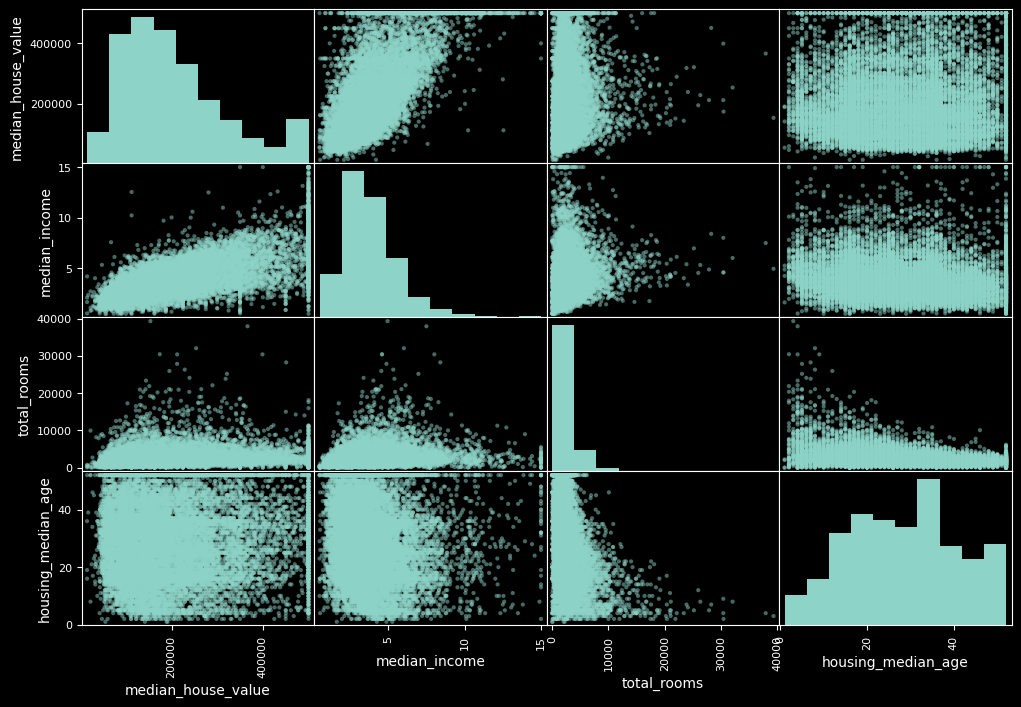

In [46]:
from pandas.plotting import scatter_matrix

attributes = ["median_house_value", "median_income", "total_rooms",
              "housing_median_age"]

scatter_matrix(housing[attributes], figsize=(12, 8))

In [47]:
import plotly.express as px

attributes = ["median_house_value", "median_income", "total_rooms",
              "housing_median_age"]

df = housing[attributes]
fig = px.scatter_matrix(df)
fig.show()

In [51]:
fig2 = px.scatter(housing, x=housing["median_income"], y=housing["median_house_value"])
fig2.show()

<Axes: xlabel='median_income', ylabel='median_house_value'>

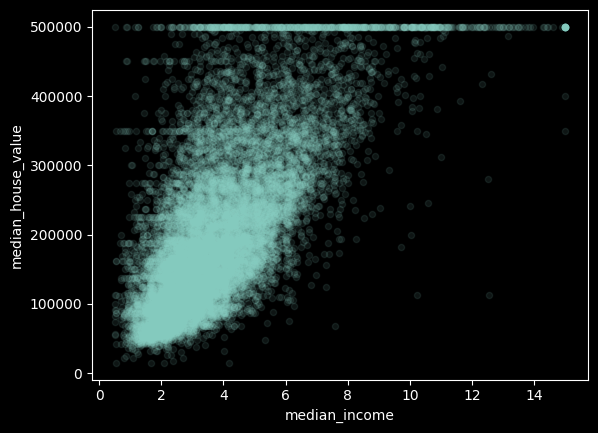

In [52]:
housing.plot(kind="scatter", x="median_income", y="median_house_value",
alpha=0.1)

In [53]:
housing["rooms_per_household"] = housing["total_rooms"]/housing["households"]
housing["bedrooms_per_room"] = housing["total_bedrooms"]/housing["total_rooms"]
housing["population_per_household"]=housing["population"]/housing["households"]

In [54]:
housing

longitude  latitude  housing_median_age  total_rooms  total_bedrooms   
13096    -122.42     37.80                52.0       3321.0          1115.0  \
14973    -118.38     34.14                40.0       1965.0           354.0   
3785     -121.98     38.36                33.0       1083.0           217.0   
14689    -117.11     33.75                17.0       4174.0           851.0   
20507    -118.15     33.77                36.0       4366.0          1211.0   
...          ...       ...                 ...          ...             ...   
14207    -118.40     33.86                41.0       2237.0           597.0   
13105    -119.31     36.32                23.0       2945.0           592.0   
19301    -117.06     32.59                13.0       3920.0           775.0   
19121    -118.40     34.06                37.0       3781.0           873.0   
19888    -122.41     37.66                44.0        431.0           195.0   

       population  households  median_income  median_house_value   
13096      1576.0      1034.0         2.0987            458300.0  \
14973       666.0       357.0         6.0876            483800.0   
3785        562.0       203.0         2.4330            101700.0   
14689      1845.0       780.0         2.2618             96100.0   
20507      1912.0      1172.0         3.5292            361800.0   
...           ...         ...            ...                 ...   
14207       938.0       523.0         4.7105            500001.0   
13105      1419.0       532.0         2.5733             88800.0   
19301      2814.0       760.0         4.0616            148800.0   
19121      1725.0       838.0         4.1455            500001.0   
19888       682.0       212.0         3.2833            233300.0   

       rooms_per_household  bedrooms_per_room  population_per_household  
13096             3.211799           0.335742                  1.524178  
14973             5.504202           0.180153                  1.865546  
3785              5.334975           0.200369                  2.768473  
14689             5.351282           0.203881                  2.365385  
20507             3.725256           0.277371                  1.631399  
...                    ...                ...                       ...  
14207             4.277247           0.266875                  1.793499  
13105             5.535714           0.201019                  2.667293  
19301             5.157895           0.197704                  3.702632  
19121             4.511933           0.230891                  2.058473  
19888             2.033019           0.452436                  3.216981  

[16512 rows x 12 columns]

In [55]:
corr_matrix = housing.corr()

In [56]:
corr_matrix["median_house_value"].sort_values(ascending=False)

median_house_value          1.000000
median_income               0.688380
rooms_per_household         0.143663
total_rooms                 0.137455
housing_median_age          0.102175
households                  0.071426
total_bedrooms              0.054635
population                 -0.020153
population_per_household   -0.038224
longitude                  -0.050859
latitude                   -0.139584
bedrooms_per_room          -0.256397
Name: median_house_value, dtype: float64

### Prepare the Data for Machine Learning Algorithms


In [57]:
strata_test_set

longitude  latitude  housing_median_age  total_rooms  total_bedrooms   
3905     -121.95     37.11                21.0       2387.0           357.0  \
16821    -118.01     33.89                36.0       1589.0           265.0   
2900     -118.18     33.74                30.0       5915.0          1750.0   
7193     -122.48     37.74                52.0       2166.0           423.0   
13928    -122.39     37.78                 5.0       1405.0           515.0   
...          ...       ...                 ...          ...             ...   
12369    -124.16     40.79                46.0       3042.0           597.0   
8707     -119.01     35.39                29.0       1820.0           459.0   
16634    -123.01     38.67                33.0        914.0           147.0   
9779     -122.03     37.60                24.0       2077.0           383.0   
3455     -117.12     32.74                52.0       1969.0           389.0   

       population  households  median_income  median_house_value   
3905        913.0       341.0         7.7360            397700.0  \
16821       804.0       272.0         4.6354            202900.0   
2900       2136.0      1503.0         4.0968            310000.0   
7193       1072.0       370.0         4.1310            314300.0   
13928       725.0       392.0         3.6037            187500.0   
...           ...         ...            ...                 ...   
12369      1206.0       541.0         2.1135             90600.0   
8707       1134.0       419.0         1.8289             59400.0   
16634       394.0       132.0         4.6875            246200.0   
9779       1488.0       389.0         4.5721            214700.0   
3455        877.0       424.0         3.7900            163400.0   

      ocean_proximity  
3905        <1H OCEAN  
16821       <1H OCEAN  
2900       NEAR OCEAN  
7193       NEAR OCEAN  
13928        NEAR BAY  
...               ...  
12369      NEAR OCEAN  
8707           INLAND  
16634       <1H OCEAN  
9779         NEAR BAY  
3455       NEAR OCEAN  

[4128 rows x 10 columns]

In [58]:
strata_train_set

longitude  latitude  housing_median_age  total_rooms  total_bedrooms   
13096    -122.42     37.80                52.0       3321.0          1115.0  \
14973    -118.38     34.14                40.0       1965.0           354.0   
3785     -121.98     38.36                33.0       1083.0           217.0   
14689    -117.11     33.75                17.0       4174.0           851.0   
20507    -118.15     33.77                36.0       4366.0          1211.0   
...          ...       ...                 ...          ...             ...   
14207    -118.40     33.86                41.0       2237.0           597.0   
13105    -119.31     36.32                23.0       2945.0           592.0   
19301    -117.06     32.59                13.0       3920.0           775.0   
19121    -118.40     34.06                37.0       3781.0           873.0   
19888    -122.41     37.66                44.0        431.0           195.0   

       population  households  median_income  median_house_value   
13096      1576.0      1034.0         2.0987            458300.0  \
14973       666.0       357.0         6.0876            483800.0   
3785        562.0       203.0         2.4330            101700.0   
14689      1845.0       780.0         2.2618             96100.0   
20507      1912.0      1172.0         3.5292            361800.0   
...           ...         ...            ...                 ...   
14207       938.0       523.0         4.7105            500001.0   
13105      1419.0       532.0         2.5733             88800.0   
19301      2814.0       760.0         4.0616            148800.0   
19121      1725.0       838.0         4.1455            500001.0   
19888       682.0       212.0         3.2833            233300.0   

      ocean_proximity  
13096        NEAR BAY  
14973       <1H OCEAN  
3785           INLAND  
14689          INLAND  
20507      NEAR OCEAN  
...               ...  
14207       <1H OCEAN  
13105          INLAND  
19301      NEAR OCEAN  
19121       <1H OCEAN  
19888      NEAR OCEAN  

[16512 rows x 10 columns]

In [63]:
columns_to_drop = ["median_house_value","ocean_proximity"]
strata_train_set.drop(columns_to_drop, axis=1)
housing_labels = strata_train_set["median_house_value"].copy()
housing_labels

13096    458300.0
14973    483800.0
3785     101700.0
14689     96100.0
20507    361800.0
           ...   
14207    500001.0
13105     88800.0
19301    148800.0
19121    500001.0
19888    233300.0
Name: median_house_value, Length: 16512, dtype: float64

##### Data Cleaning

###### Most Machine Learning algorithms cannot work with missing features, so let’s create
###### a few functions to take care of them. You noticed earlier that the total_bedrooms
###### attribute has some missing values, so let’s fix this. You have three options:
• Get rid of the corresponding districts.
• Get rid of the whole attribute.
• Set the values to some value (zero, the mean, the median, etc.).

In [64]:
housing.describe()

longitude      latitude  housing_median_age   total_rooms   
count  16512.000000  16512.000000        16512.000000  16512.000000  \
mean    -119.573125     35.637746           28.577156   2639.402798   
std        2.000624      2.133294           12.585738   2185.287466   
min     -124.350000     32.550000            1.000000      2.000000   
25%     -121.800000     33.930000           18.000000   1447.000000   
50%     -118.510000     34.260000           29.000000   2125.000000   
75%     -118.010000     37.720000           37.000000   3154.000000   
max     -114.490000     41.950000           52.000000  39320.000000   

       total_bedrooms    population    households  median_income   
count    16344.000000  16512.000000  16512.000000   16512.000000  \
mean       538.949094   1425.513929    499.990189       3.870428   
std        423.862079   1094.795467    382.865787       1.891936   
min          1.000000      3.000000      1.000000       0.499900   
25%        296.000000    787.000000    279.000000       2.562500   
50%        434.000000   1167.000000    408.000000       3.538500   
75%        645.000000   1726.000000    603.000000       4.750000   
max       6210.000000  16305.000000   5358.000000      15.000100   

       median_house_value  rooms_per_household  bedrooms_per_room   
count        16512.000000         16512.000000       16344.000000  \
mean        206333.518653             5.441010           0.212796   
std         115314.047529             2.574143           0.057417   
min          14999.000000             0.888889           0.100000   
25%         119200.000000             4.443636           0.175257   
50%         179200.000000             5.235573           0.203106   
75%         263925.000000             6.053843           0.239421   
max         500001.000000           141.909091           1.000000   

       population_per_household  
count              16512.000000  
mean                   2.995974  
std                    4.457373  
min                    0.692308  
25%                    2.433426  
50%                    2.822316  
75%                    3.286385  
max                  502.461538

In [65]:
housing.info()

<class 'pandas.core.frame.DataFrame'>
Index: 16512 entries, 13096 to 19888
Data columns (total 12 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   longitude                 16512 non-null  float64
 1   latitude                  16512 non-null  float64
 2   housing_median_age        16512 non-null  float64
 3   total_rooms               16512 non-null  float64
 4   total_bedrooms            16344 non-null  float64
 5   population                16512 non-null  float64
 6   households                16512 non-null  float64
 7   median_income             16512 non-null  float64
 8   median_house_value        16512 non-null  float64
 9   rooms_per_household       16512 non-null  float64
 10  bedrooms_per_room         16344 non-null  float64
 11  population_per_household  16512 non-null  float64
dtypes: float64(12)
memory usage: 1.6 MB


In [70]:
null_rows_idx = housing.isnull().any(axis=1)
null_rows_idx
housing.loc[null_rows_idx].tail()

longitude  latitude  housing_median_age  total_rooms  total_bedrooms   
2348     -122.70     38.35                14.0       2313.0             NaN  \
366      -122.50     37.75                44.0       1819.0             NaN   
18241    -121.44     38.54                39.0       2855.0             NaN   
18493    -116.21     33.75                22.0        894.0             NaN   
16519    -117.86     34.01                16.0       4632.0             NaN   

       population  households  median_income  median_house_value   
2348        954.0       397.0         3.7813            146500.0  \
366        1137.0       354.0         3.4919            271800.0   
18241      1217.0       562.0         3.2404             93600.0   
18493       830.0       202.0         3.0673             68200.0   
16519      3038.0       727.0         5.1762            264400.0   

       rooms_per_household  bedrooms_per_room  population_per_household  
2348              5.826196                NaN                  2.403023  
366               5.138418                NaN                  3.211864  
18241             5.080071                NaN                  2.165480  
18493             4.425743                NaN                  4.108911  
16519             6.371389                NaN                  4.178817

In [74]:
housing_option1 = housing.copy()
housing_option1.dropna(subset=["total_bedrooms"], inplace=True)
housing_option1.loc[null_rows_idx]

Empty DataFrame
Columns: [longitude, latitude, housing_median_age, total_rooms, total_bedrooms, population, households, median_income, median_house_value, rooms_per_household, bedrooms_per_room, population_per_household]
Index: []

In [78]:
housing_option2 = housing.copy()
housing_option2.drop("total_bedrooms", inplace=True, axis=1)
housing_option2

longitude  latitude  housing_median_age  total_rooms  population   
13096    -122.42     37.80                52.0       3321.0      1576.0  \
14973    -118.38     34.14                40.0       1965.0       666.0   
3785     -121.98     38.36                33.0       1083.0       562.0   
14689    -117.11     33.75                17.0       4174.0      1845.0   
20507    -118.15     33.77                36.0       4366.0      1912.0   
...          ...       ...                 ...          ...         ...   
14207    -118.40     33.86                41.0       2237.0       938.0   
13105    -119.31     36.32                23.0       2945.0      1419.0   
19301    -117.06     32.59                13.0       3920.0      2814.0   
19121    -118.40     34.06                37.0       3781.0      1725.0   
19888    -122.41     37.66                44.0        431.0       682.0   

       households  median_income  median_house_value  rooms_per_household   
13096      1034.0         2.0987            458300.0             3.211799  \
14973       357.0         6.0876            483800.0             5.504202   
3785        203.0         2.4330            101700.0             5.334975   
14689       780.0         2.2618             96100.0             5.351282   
20507      1172.0         3.5292            361800.0             3.725256   
...           ...            ...                 ...                  ...   
14207       523.0         4.7105            500001.0             4.277247   
13105       532.0         2.5733             88800.0             5.535714   
19301       760.0         4.0616            148800.0             5.157895   
19121       838.0         4.1455            500001.0             4.511933   
19888       212.0         3.2833            233300.0             2.033019   

       bedrooms_per_room  population_per_household  
13096           0.335742                  1.524178  
14973           0.180153                  1.865546  
3785            0.200369                  2.768473  
14689           0.203881                  2.365385  
20507           0.277371                  1.631399  
...                  ...                       ...  
14207           0.266875                  1.793499  
13105           0.201019                  2.667293  
19301           0.197704                  3.702632  
19121           0.230891                  2.058473  
19888           0.452436                  3.216981  

[16512 rows x 11 columns]

In [79]:
housing_option3 = housing.copy()

median = housing["total_bedrooms"].median()
housing_option3["total_bedrooms"].fillna(median, inplace=True)  # option 3

housing_option3.loc[null_rows_idx].head()

longitude  latitude  housing_median_age  total_rooms  total_bedrooms   
14452    -120.67     40.50                15.0       5343.0           434.0  \
18217    -117.96     34.03                35.0       2093.0           434.0   
11889    -118.05     34.04                33.0       1348.0           434.0   
20325    -118.88     34.17                15.0       4260.0           434.0   
14360    -117.87     33.62                 8.0       1266.0           434.0   

       population  households  median_income  median_house_value   
14452      2503.0       902.0         3.5962             85900.0  \
18217      1755.0       403.0         3.4115            150400.0   
11889      1098.0       257.0         4.2917            161200.0   
20325      1701.0       669.0         5.1033            410700.0   
14360       375.0       183.0         9.8020            500001.0   

       rooms_per_household  bedrooms_per_room  population_per_household  
14452             5.923503                NaN                  2.774945  
18217             5.193548                NaN                  4.354839  
11889             5.245136                NaN                  4.272374  
20325             6.367713                NaN                  2.542601  
14360             6.918033                NaN                  2.049180

#### using Sklean 

In [84]:
from sklearn.impute import SimpleImputer

imputer = SimpleImputer(strategy='median')

In [85]:
housing_drop_proximity = housing.copy()
imputer.fit(housing_drop_proximity)

SimpleImputer(strategy='median')

In [86]:
imputer.statistics_

array([-1.18510000e+02,  3.42600000e+01,  2.90000000e+01,  2.12500000e+03,
        4.34000000e+02,  1.16700000e+03,  4.08000000e+02,  3.53850000e+00,
        1.79200000e+05,  5.23557310e+00,  2.03105786e-01,  2.82231619e+00])

In [87]:
housing.median().values

array([-1.18510000e+02,  3.42600000e+01,  2.90000000e+01,  2.12500000e+03,
        4.34000000e+02,  1.16700000e+03,  4.08000000e+02,  3.53850000e+00,
        1.79200000e+05,  5.23557310e+00,  2.03105786e-01,  2.82231619e+00])

In [ ]:
# To be continue